In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
import inspect

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [4]:
from pyha.applications.spectrogram_limesdr.spectrogram_limesdr import SpectrogramLimeSDR
print(inspect.getdoc(SpectrogramLimeSDR))
print('\n\nMain interface\n' + inspect.getdoc(SpectrogramLimeSDR.main))

8k FFT spectrogram for LimeSDR Mini.


Main interface
Args:
    input (DataValid): 12 bit IQ, -1.0 ... 1.0 range

Returns:
    DataValid: Upper 32 bits from the spectrogram core.


# Examples

## High power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...
100%|██████████| 262144/262144 [04:16<00:00, 1023.40it/s]
INFO:sim:Flushing the pipeline to collect 2048 valid samples (currently have 1536)
INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


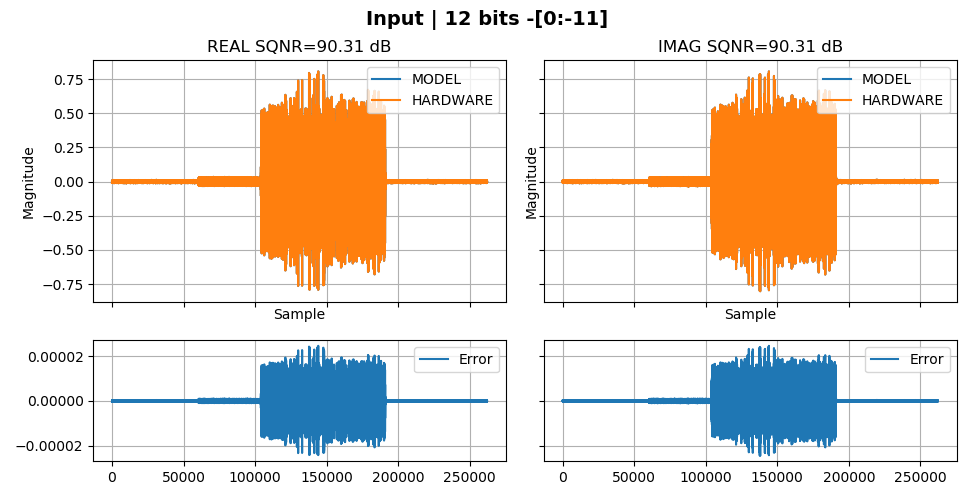

<IPython.core.display.Javascript object>


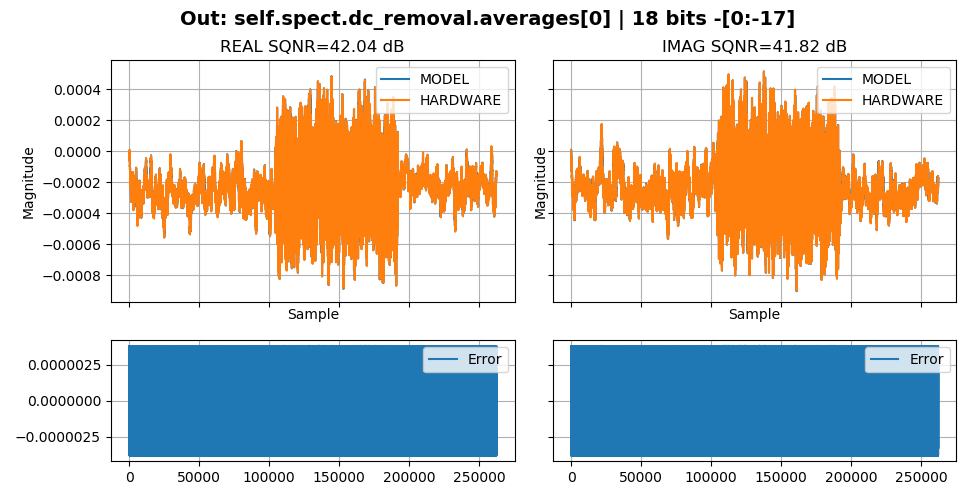

<IPython.core.display.Javascript object>


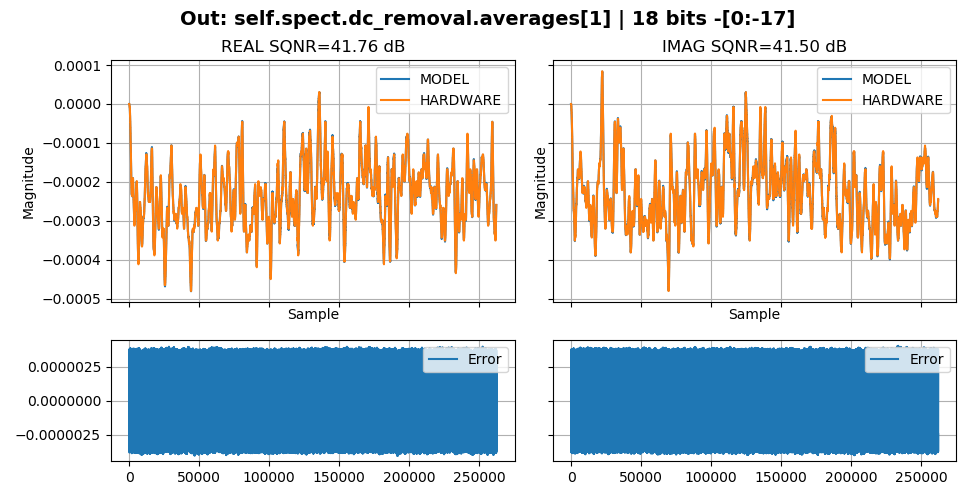

<IPython.core.display.Javascript object>


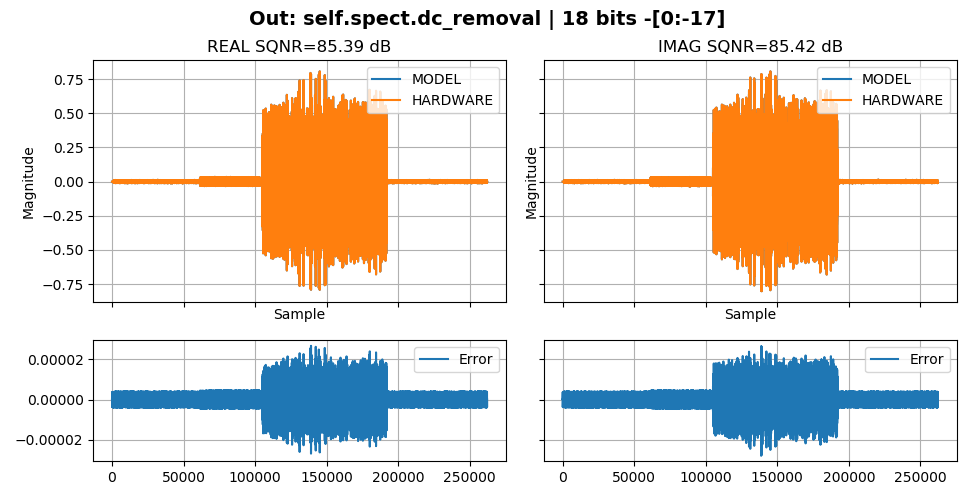

<IPython.core.display.Javascript object>


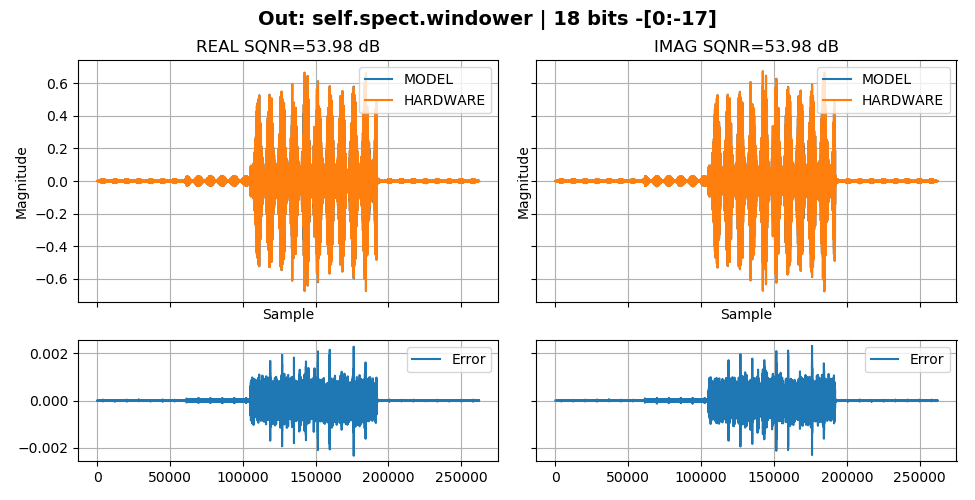

<IPython.core.display.Javascript object>


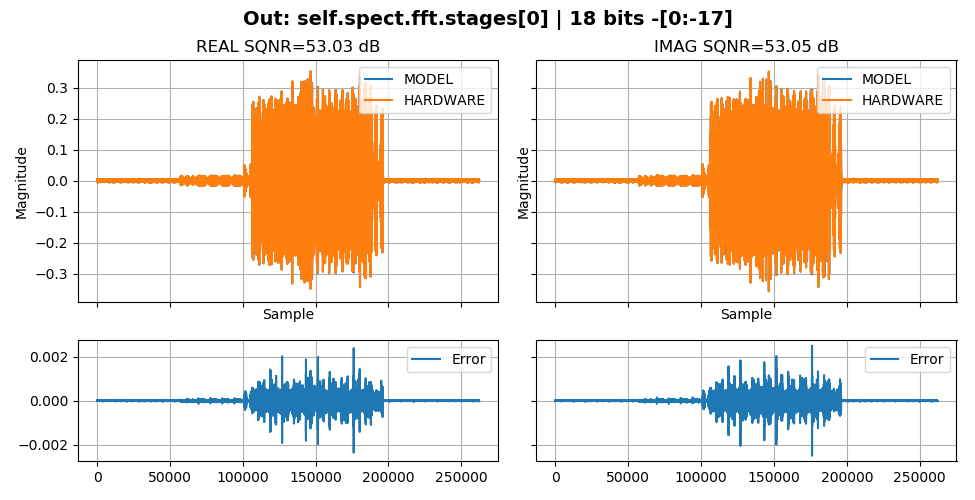

<IPython.core.display.Javascript object>


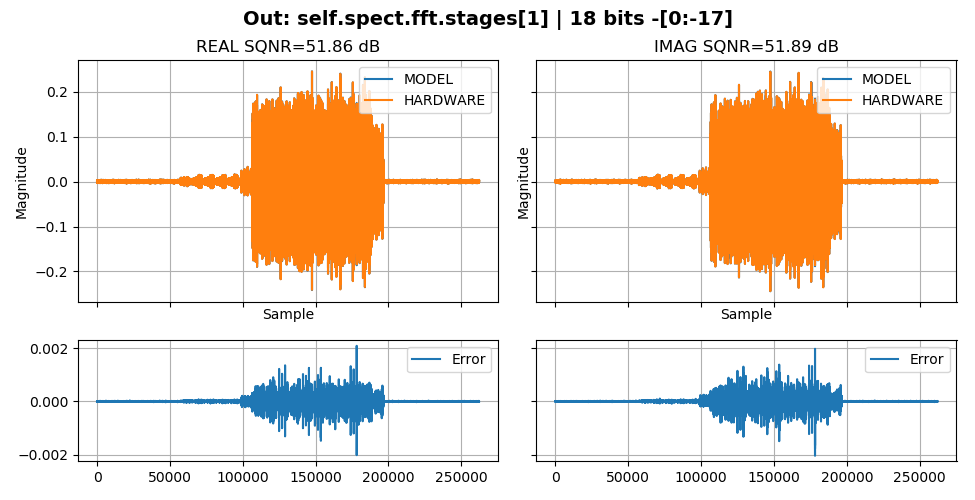

<IPython.core.display.Javascript object>


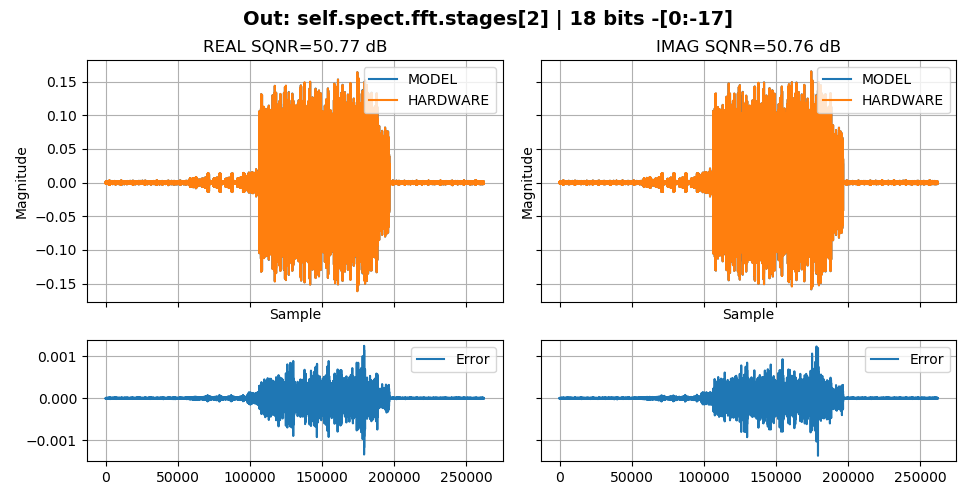

<IPython.core.display.Javascript object>


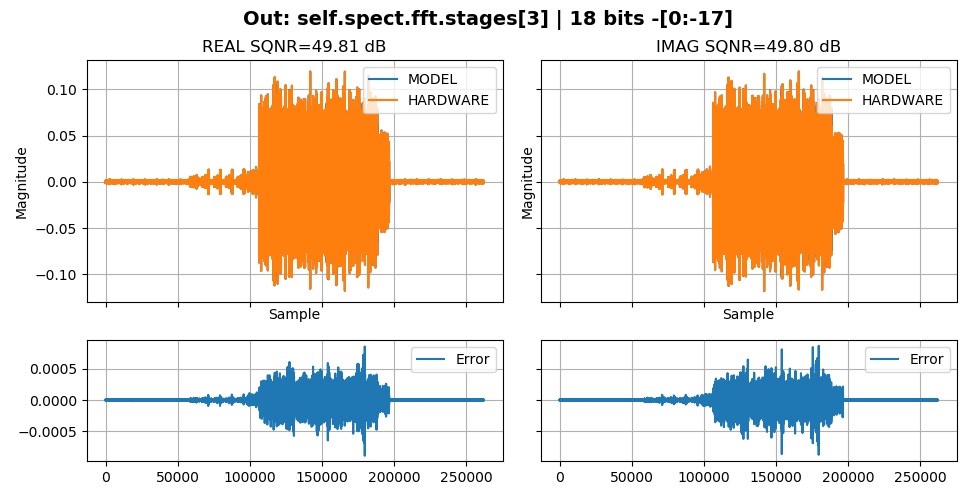

<IPython.core.display.Javascript object>


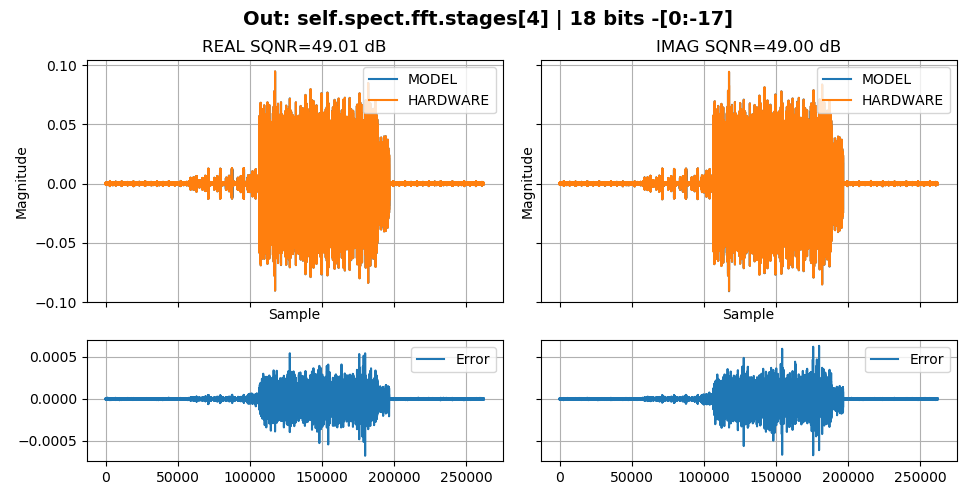

<IPython.core.display.Javascript object>


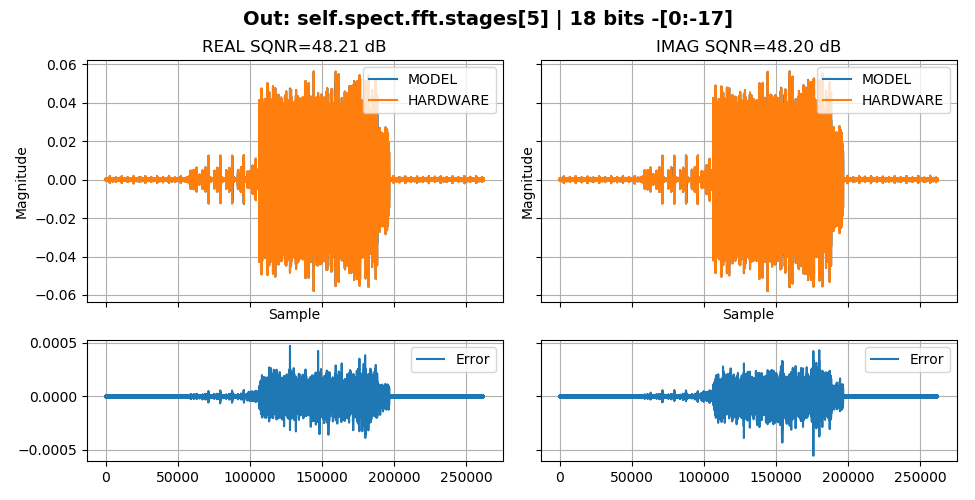

<IPython.core.display.Javascript object>


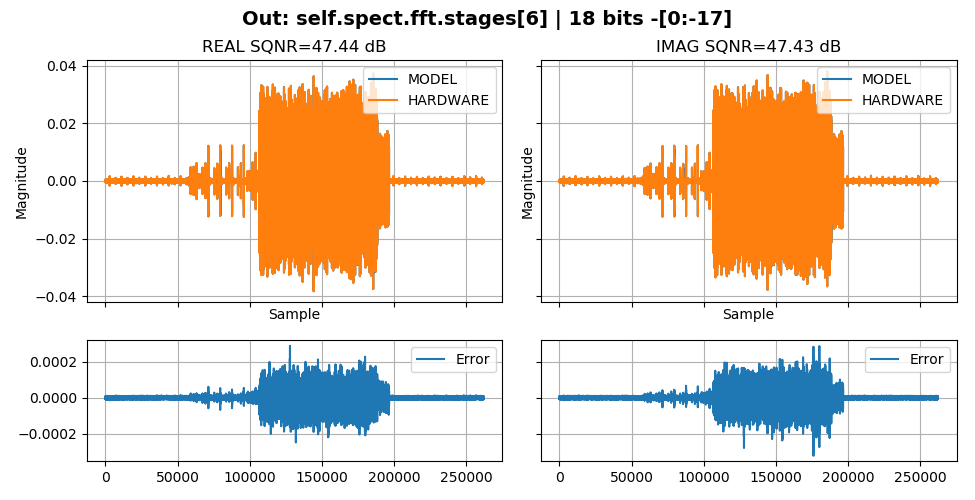

<IPython.core.display.Javascript object>


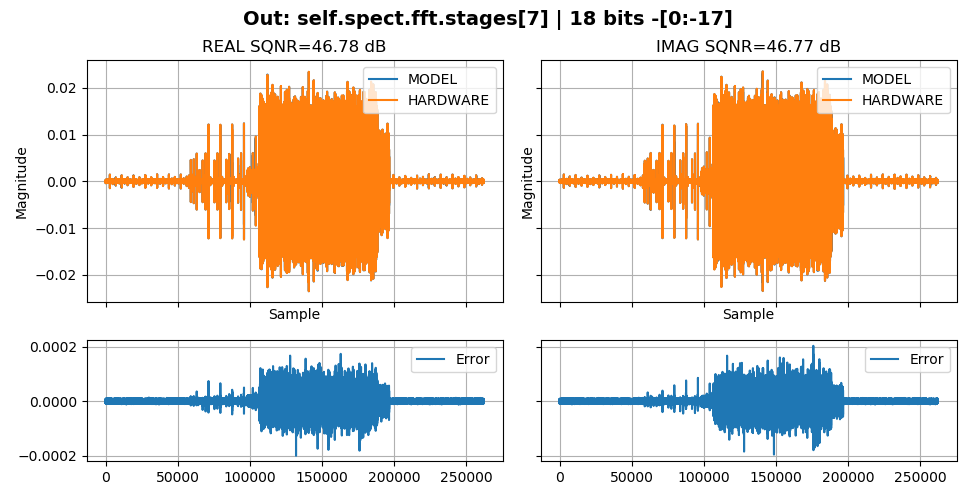

<IPython.core.display.Javascript object>


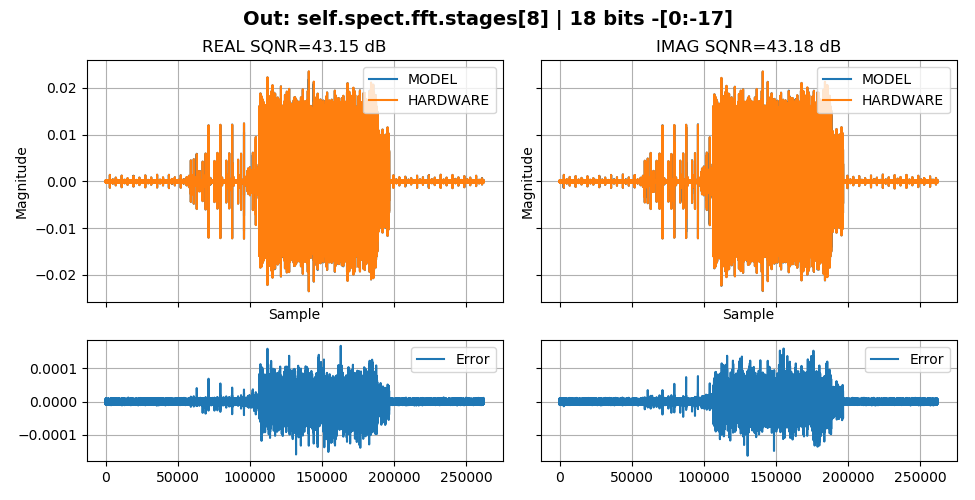

<IPython.core.display.Javascript object>


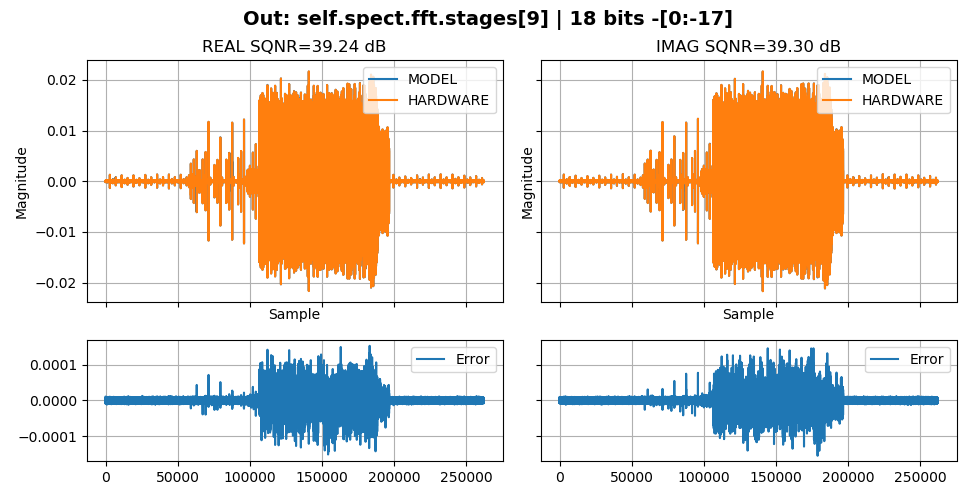

<IPython.core.display.Javascript object>


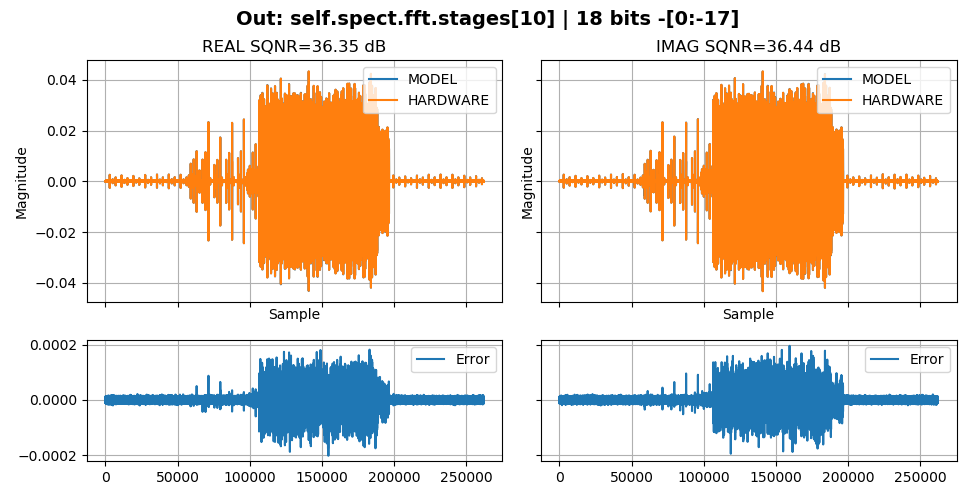

<IPython.core.display.Javascript object>


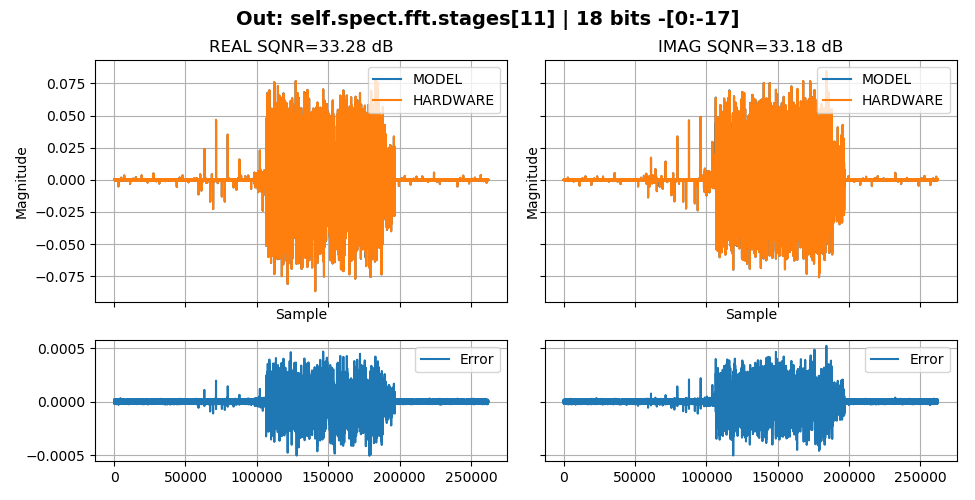

<IPython.core.display.Javascript object>


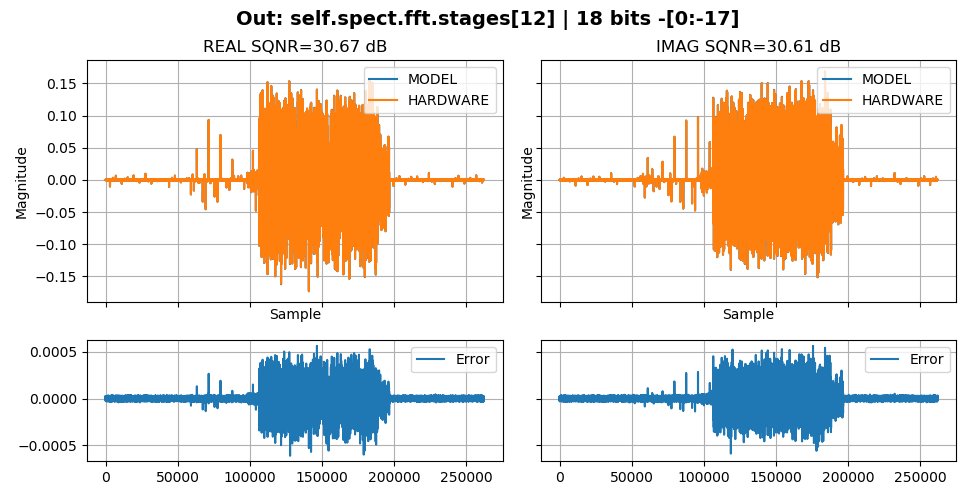

<IPython.core.display.Javascript object>


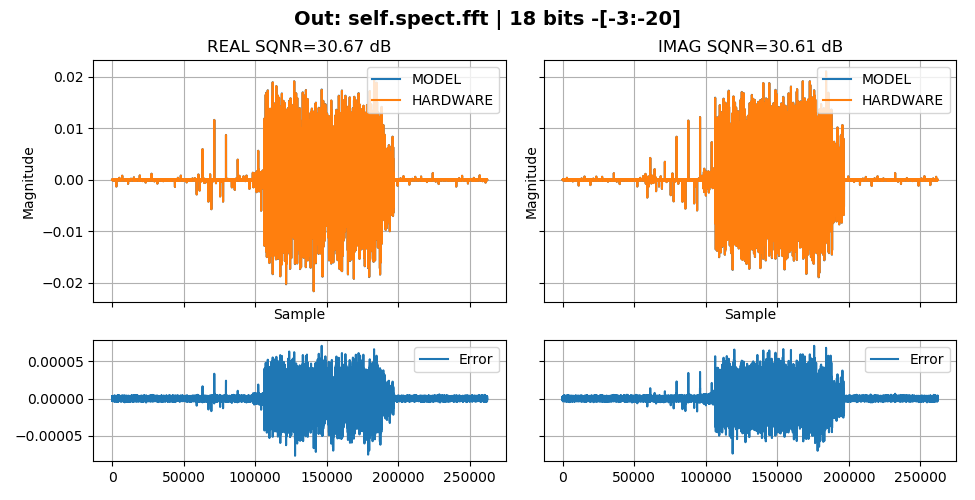

<IPython.core.display.Javascript object>


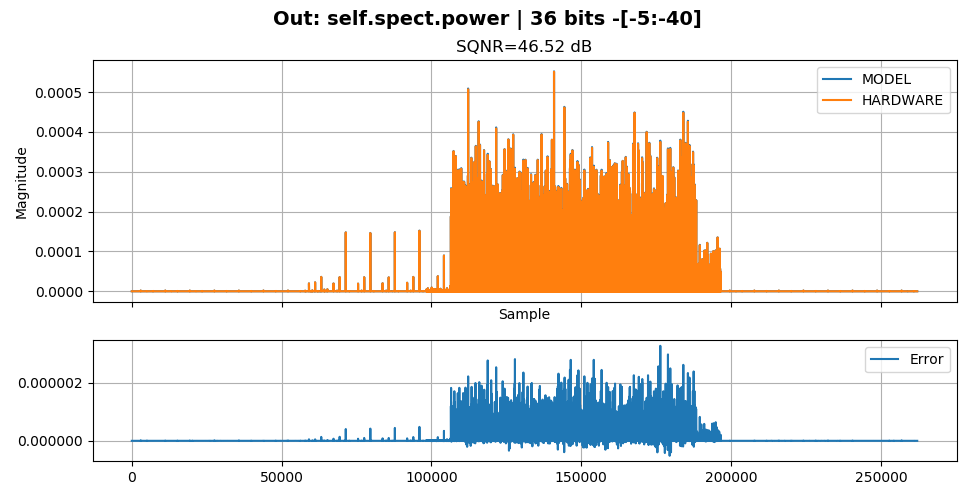

<IPython.core.display.Javascript object>


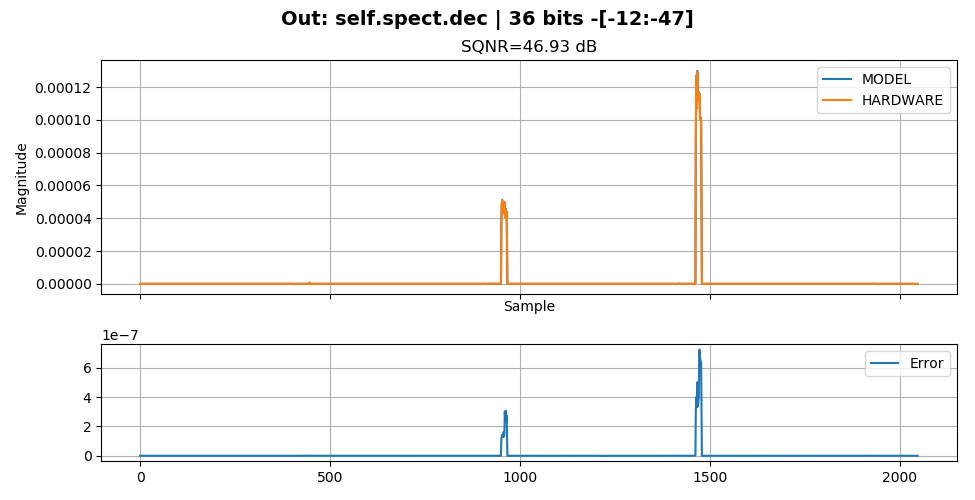

<IPython.core.display.Javascript object>


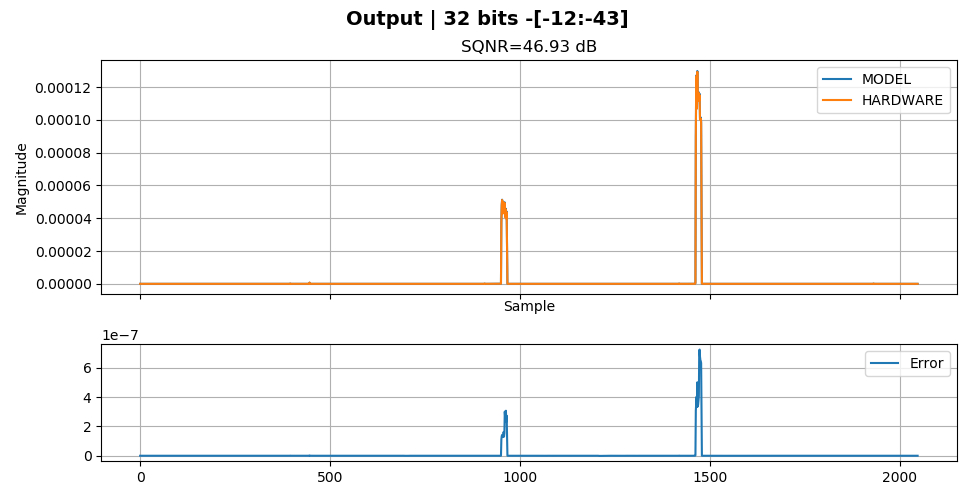

<IPython.core.display.Javascript object>


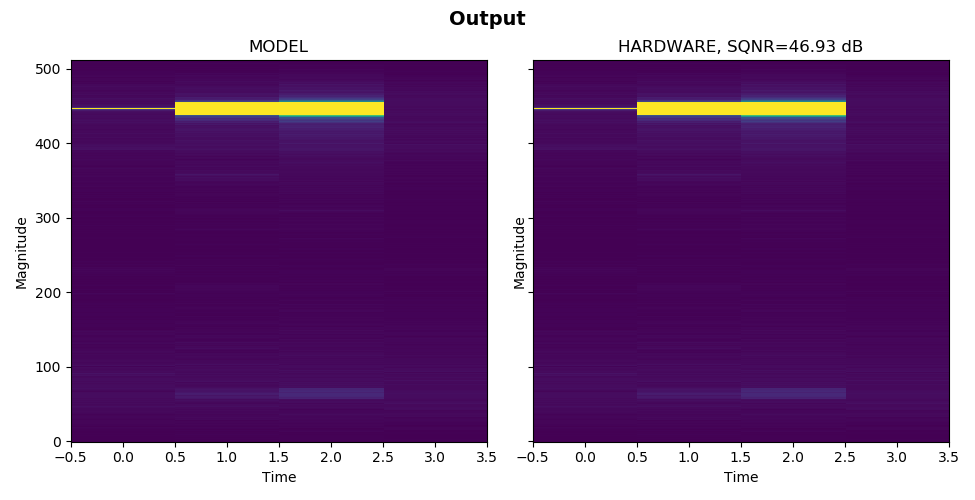

In [4]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3strong_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

<IPython.core.display.Javascript object>


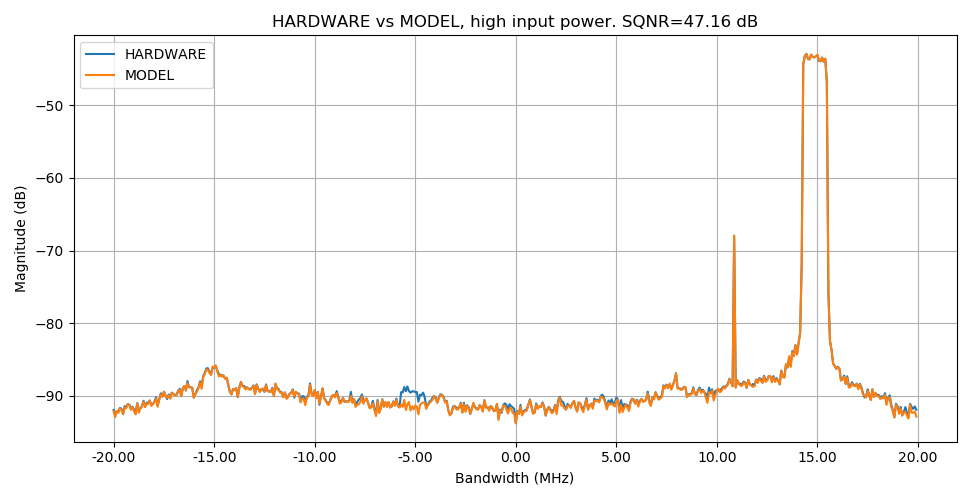

In [13]:
plt.figure(figsize = (9.75, 5))

plt.ylabel('Magnitude (dB)')
plt.xlabel('Bandwidth (MHz)')

m = np.resize(sims['MODEL'], (-1, 512))
h = np.resize(sims['HARDWARE'], (-1, 512))

xt = np.linspace(0, m[1].shape, 9, endpoint=True)
plt.xticks(xt, [f'{-20 + i * 5:.2f}' for i in range(len(xt))])

plt.title(f'HARDWARE vs MODEL, high input power. SQNR={SQNR(m[1], h[1]):.2f} dB')
plt.plot(np.log10(h[1]) * 10, label='HARDWARE')
plt.plot(np.log10(m[1]) * 10, label='MODEL')
# plt.plot(np.log10(sims['HARDWARE']) * 10)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

## Low power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...
100%|██████████| 262144/262144 [04:15<00:00, 1026.73it/s]
INFO:sim:Flushing the pipeline to collect 2048 valid samples (currently have 1536)
INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


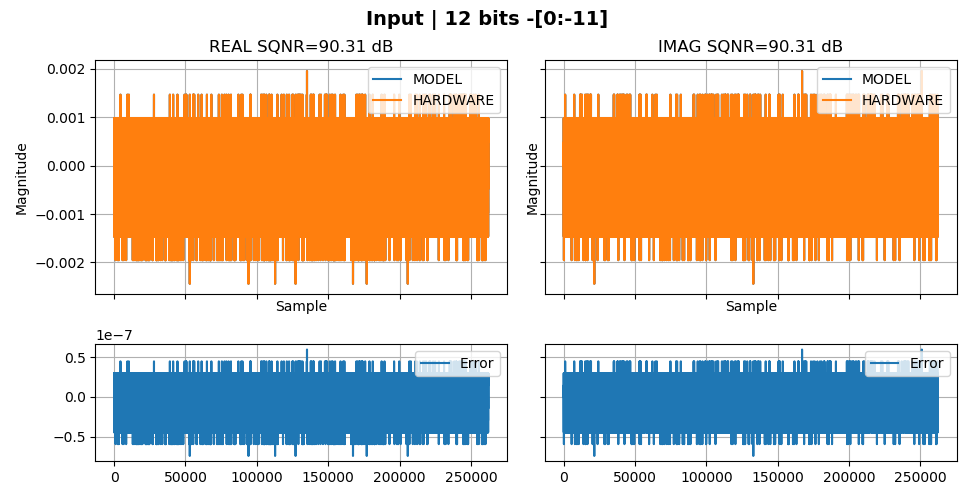

<IPython.core.display.Javascript object>


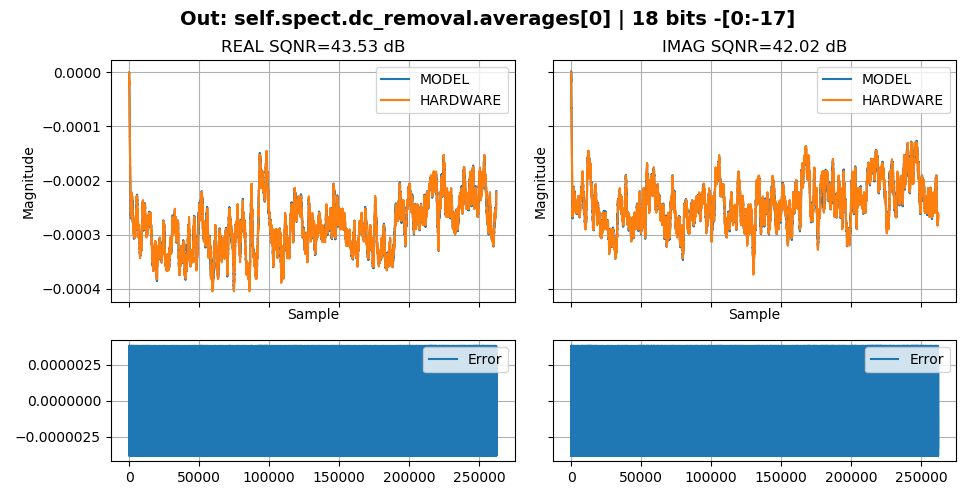

<IPython.core.display.Javascript object>


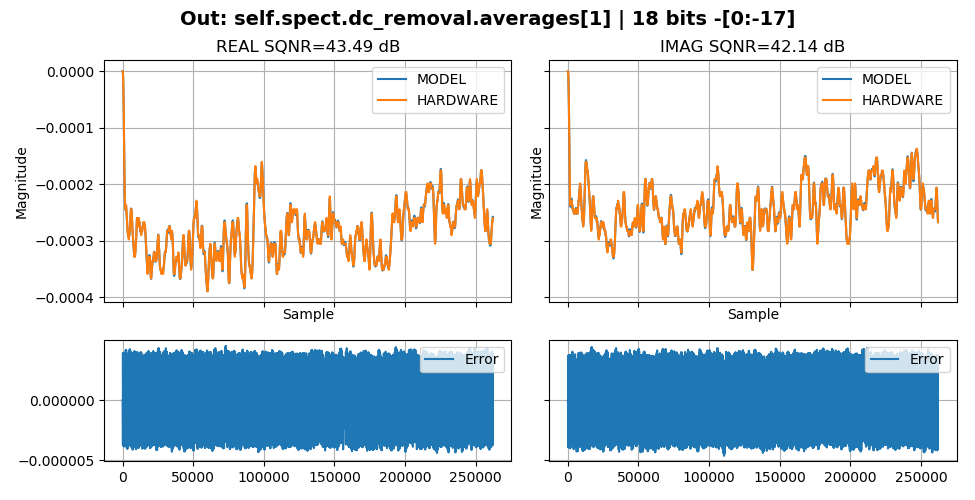

<IPython.core.display.Javascript object>


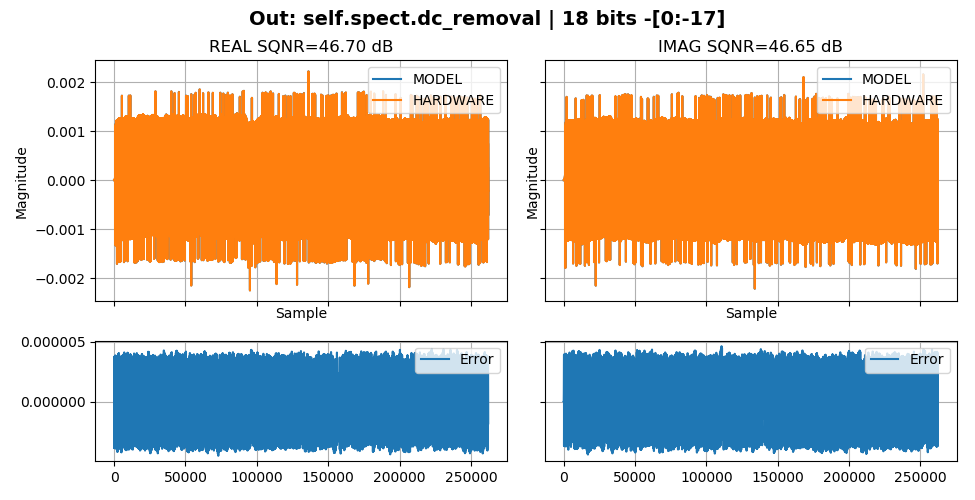

<IPython.core.display.Javascript object>


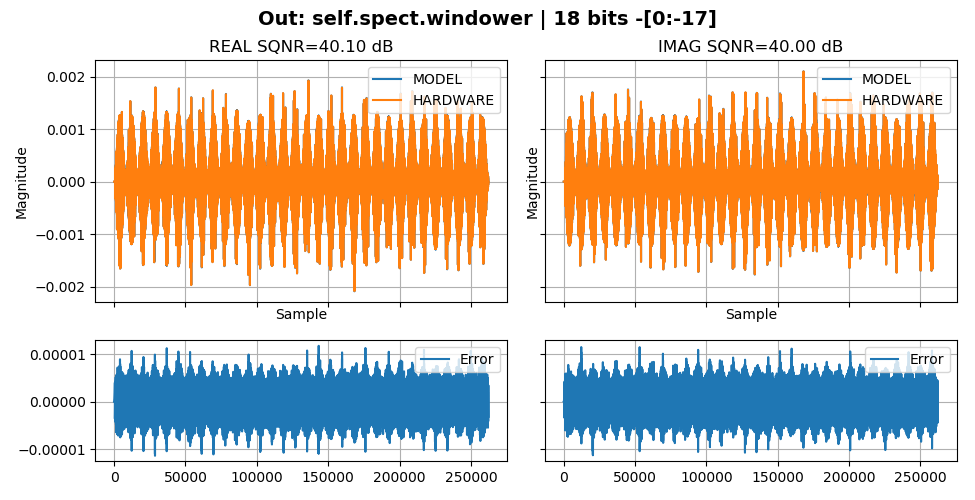

<IPython.core.display.Javascript object>


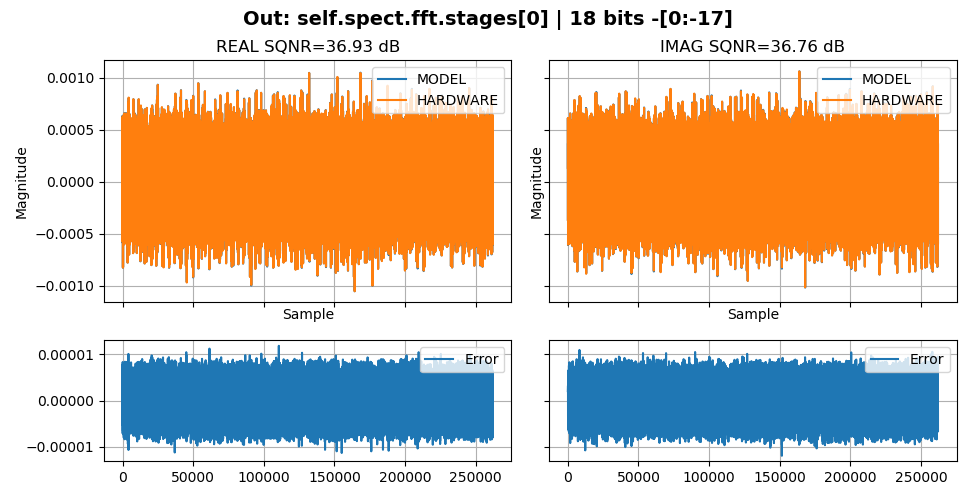

<IPython.core.display.Javascript object>


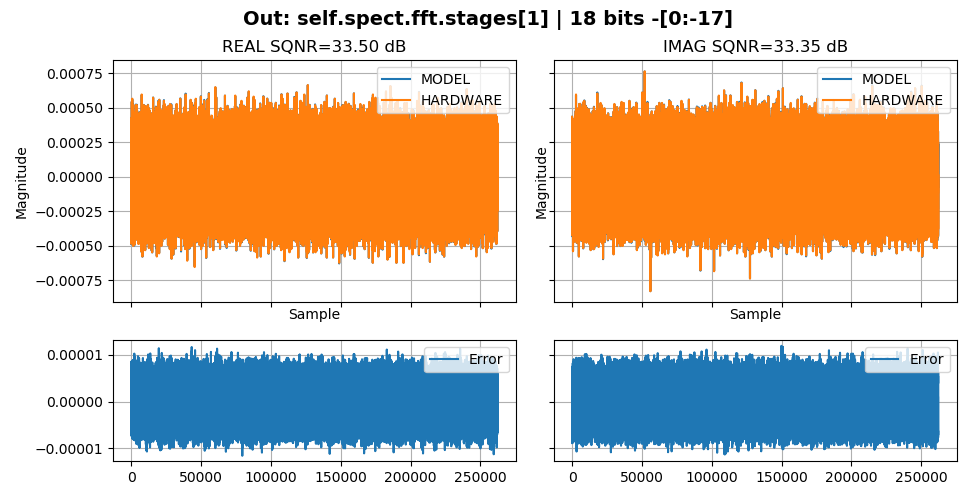

<IPython.core.display.Javascript object>


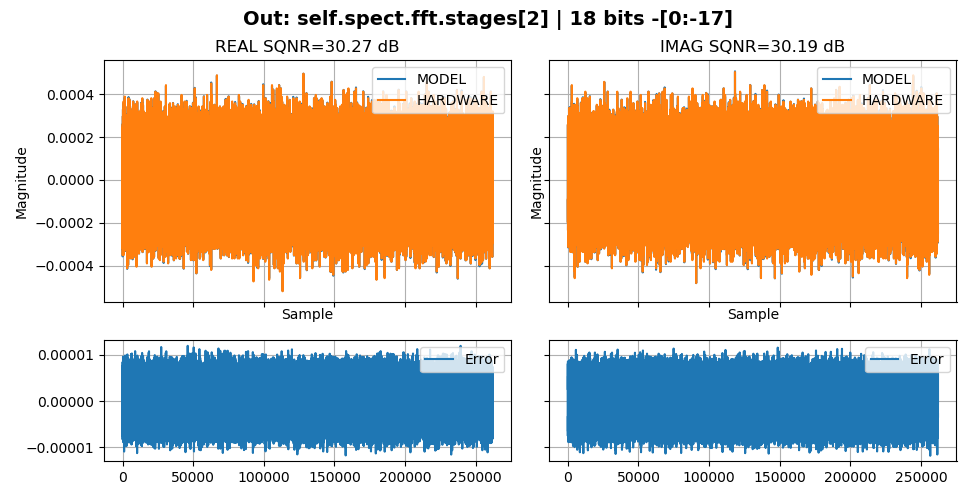

<IPython.core.display.Javascript object>


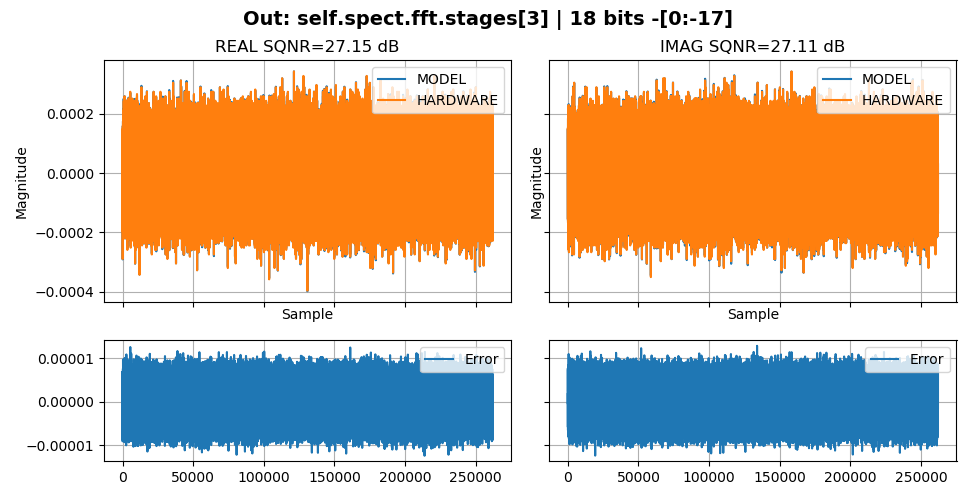

<IPython.core.display.Javascript object>


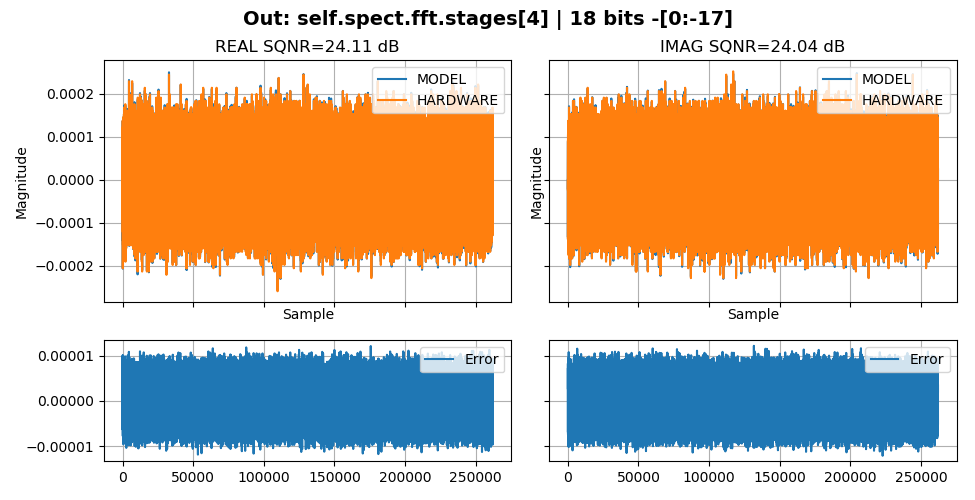

<IPython.core.display.Javascript object>


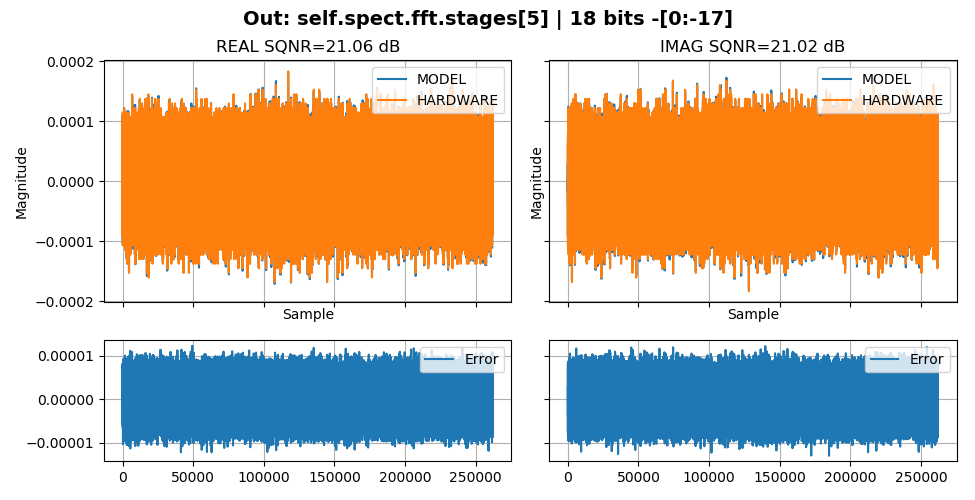

<IPython.core.display.Javascript object>


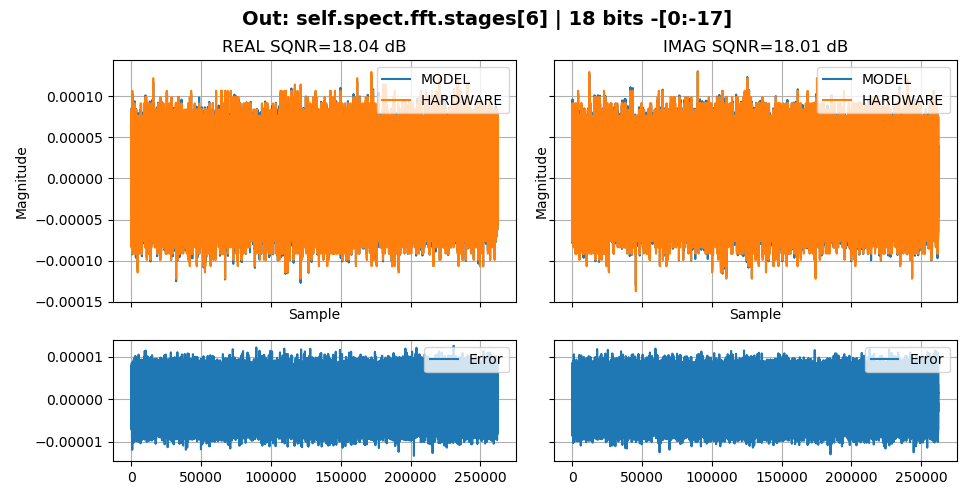

<IPython.core.display.Javascript object>


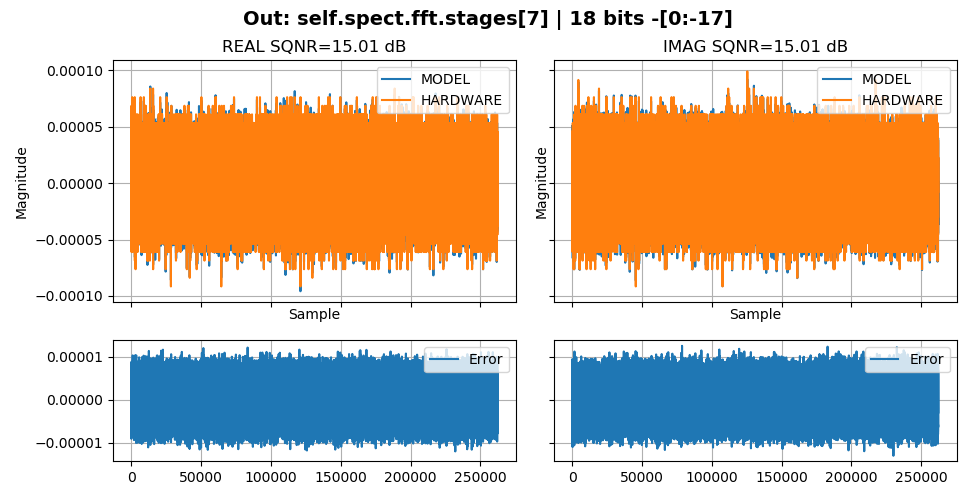

<IPython.core.display.Javascript object>


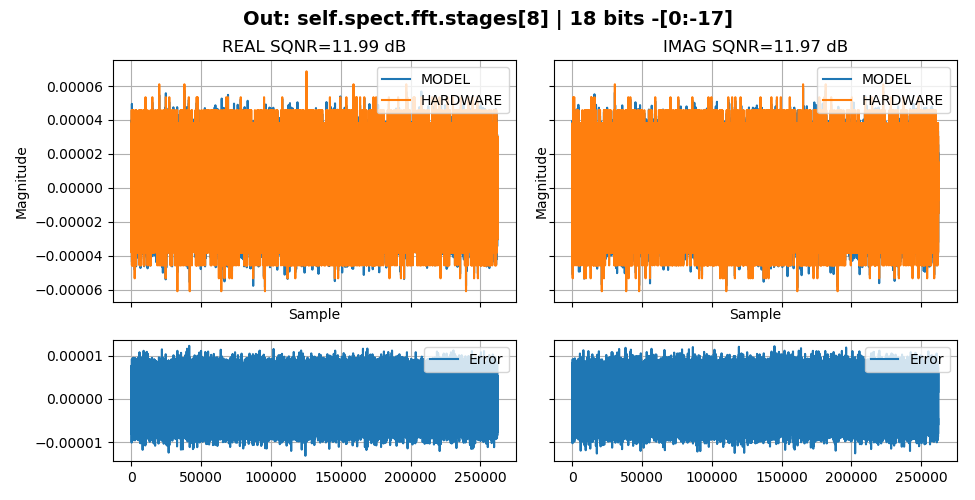

<IPython.core.display.Javascript object>


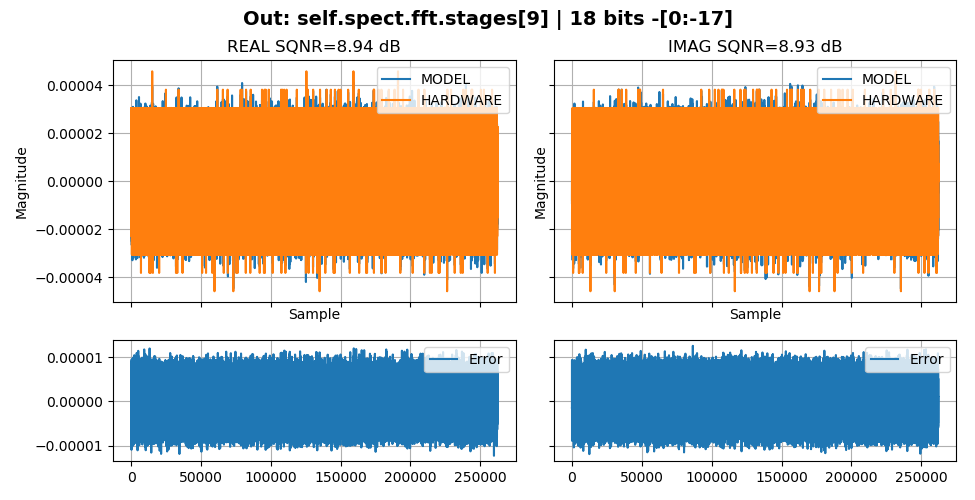

<IPython.core.display.Javascript object>


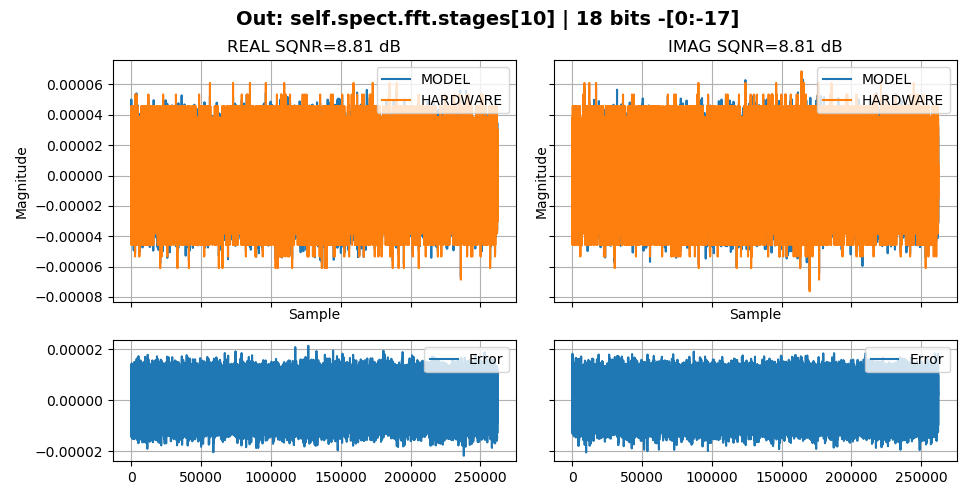

<IPython.core.display.Javascript object>


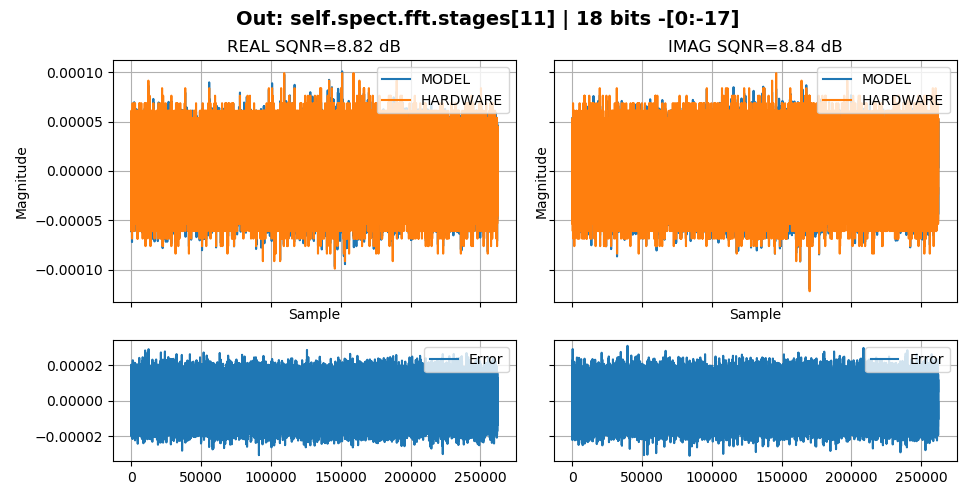

<IPython.core.display.Javascript object>


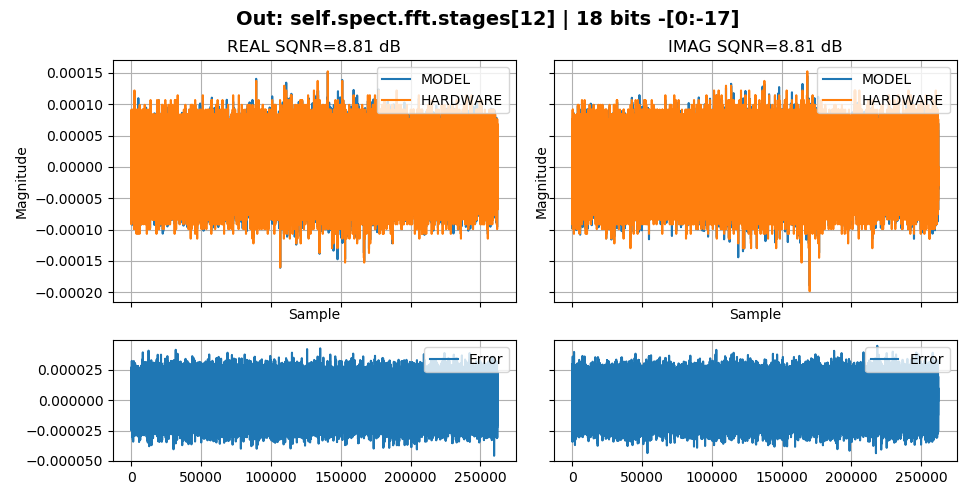

<IPython.core.display.Javascript object>


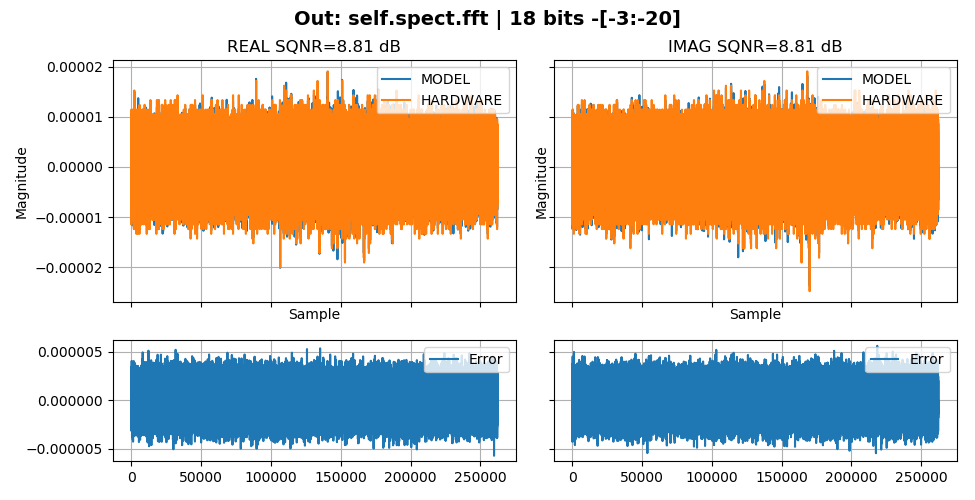

<IPython.core.display.Javascript object>


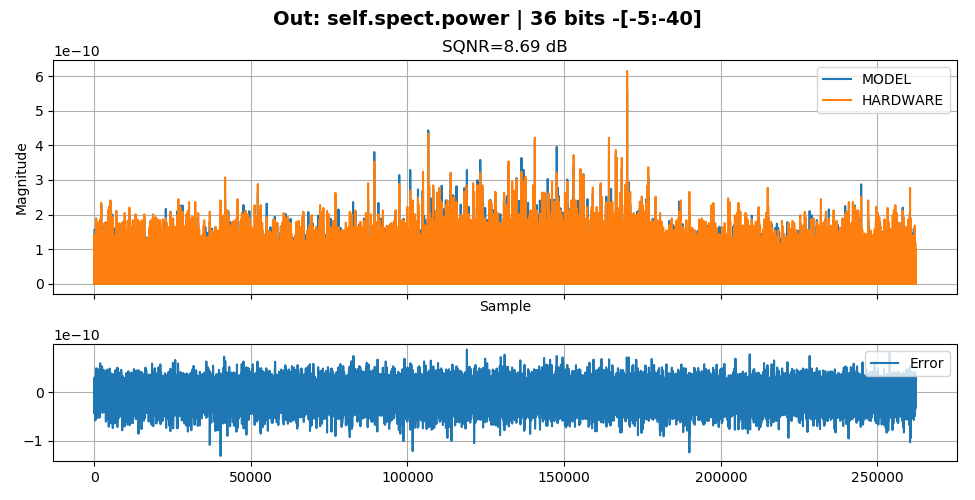

<IPython.core.display.Javascript object>


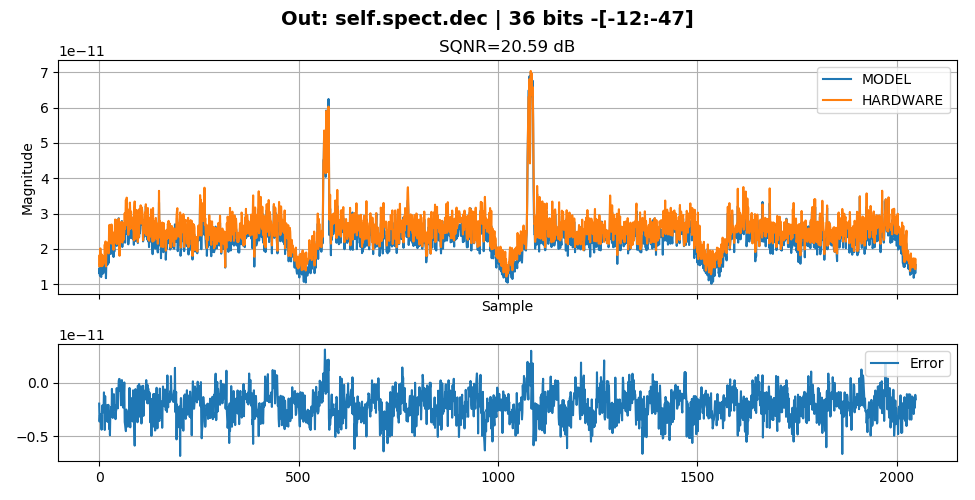

<IPython.core.display.Javascript object>


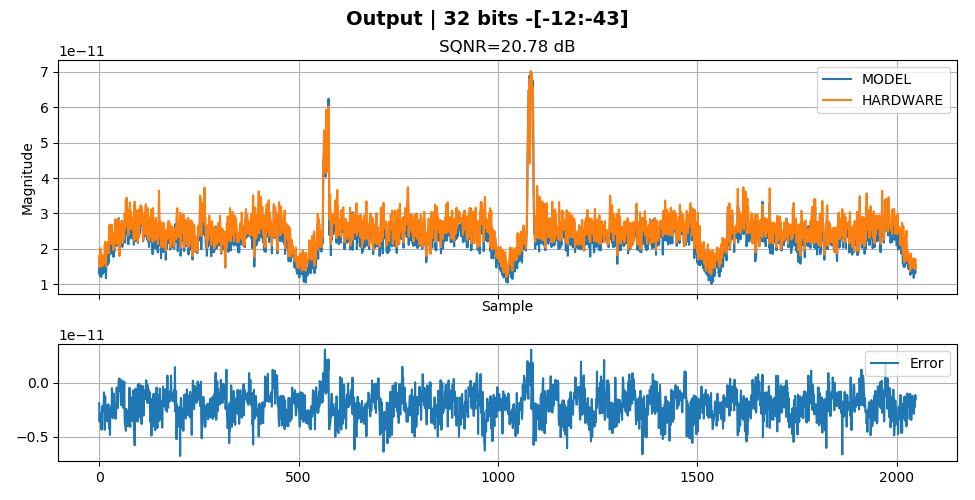

<IPython.core.display.Javascript object>


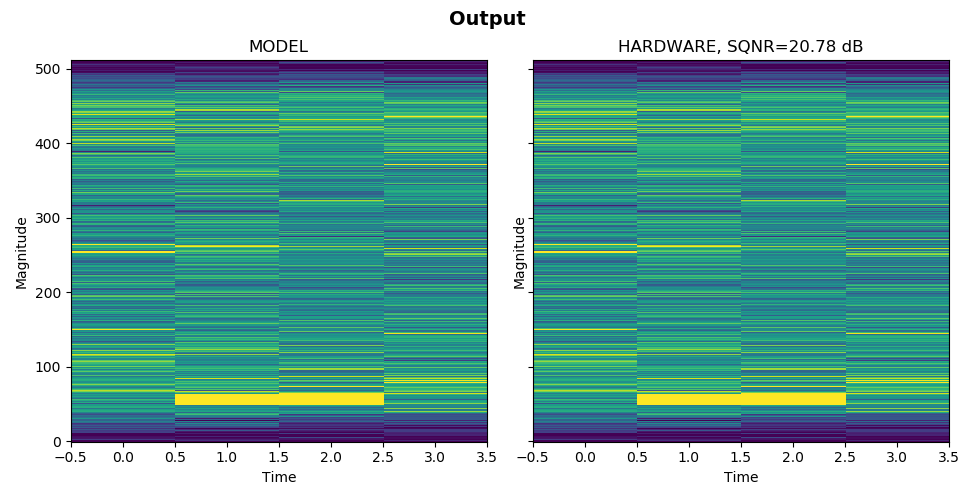

In [9]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims_low = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims_low, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

<IPython.core.display.Javascript object>


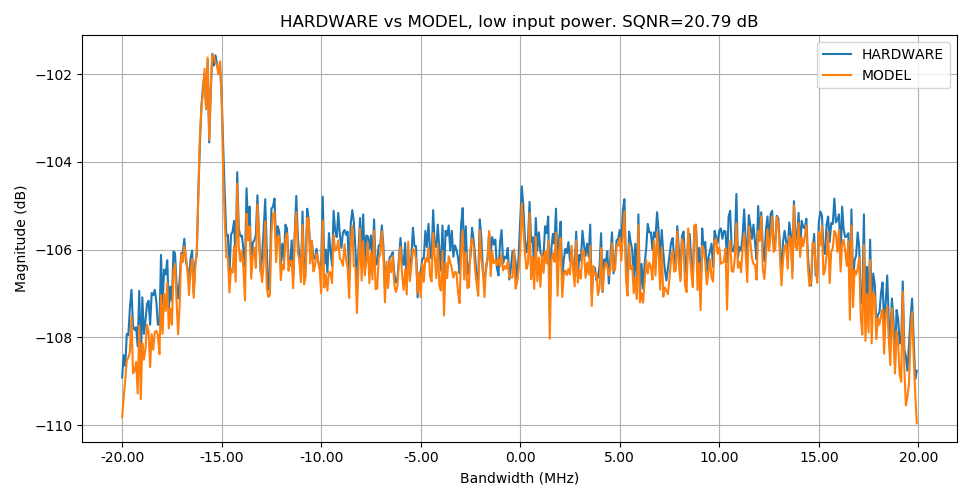

In [14]:
plt.figure(figsize = (9.75, 5))

plt.ylabel('Magnitude (dB)')
plt.xlabel('Bandwidth (MHz)')

m = np.resize(sims_low['MODEL'], (-1, 512))
h = np.resize(sims_low['HARDWARE'], (-1, 512))

xt = np.linspace(0, m[1].shape, 9, endpoint=True)
plt.xticks(xt, [f'{-20 + i * 5:.2f}' for i in range(len(xt))])

plt.title(f'HARDWARE vs MODEL, low input power. SQNR={SQNR(m[2], h[2]):.2f} dB')
plt.plot(np.log10(h[2]) * 10, label='HARDWARE')
plt.plot(np.log10(m[2]) * 10, label='MODEL')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

# Conversion to VHDL and RTL/NETLIST simulations

In [6]:
dut = SpectrogramLimeSDR()
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m'))
minimal_input = input_signal[:dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS]
sims = simulate(dut, minimal_input, pipeline_flush='auto', 
                simulations=['MODEL', 'HARDWARE', 'RTL', 'NETLIST'], 
                conversion_path='/tmp/pyha_output')
assert hardware_sims_equal(sims)

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "HARDWARE" simulation...
100%|██████████| 65536/65536 [06:27<00:00, 169.09it/s]
INFO:sim:Flushing the pipeline to collect 512 valid samples (currently have 0)
INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:Windower to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownC

KeyboardInterrupt: 

# Synthesis:  resource usage and Fmax

In [7]:
quartus = get_simulator_quartus() # reuse the work that was done during the simulation
print(quartus.get_resource_usage('fit'))
print(quartus.get_fmax())

INFO:synth:Running quartus_fit quartus_project...
INFO:synth:Running quartus_sta -t script.tcl...


Family : Cyclone IV E
Device : EP4CE40F23C8
Timing Models : Final
Total logic elements : 11,049 / 39,600 ( 28 % )
    Total combinational functions : 10,781 / 39,600 ( 27 % )
    Dedicated logic registers : 2,755 / 39,600 ( 7 % )
Total registers : 2755
Total pins : 60 / 329 ( 18 % )
Total virtual pins : 0
Total memory bits : 392,244 / 1,161,216 ( 34 % )
Embedded Multiplier 9-bit elements : 104 / 232 ( 45 % )
Total PLLs : 0 / 4 ( 0 % )

+-------------------------------------------------+
; Fmax Summary                                    ;
+-----------+-----------------+------------+------+
; Fmax      ; Restricted Fmax ; Clock Name ; Note ;
+-----------+-----------------+------------+------+
; 86.53 MHz ; 86.53 MHz       ; clk        ;      ;
+-----------+-----------------+------------+------+
This panel reports FMAX for every clock in the design, regardless of the user-specified clock periods.  FMAX is only computed for paths where the source and destination registers or ports are driv